In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.svm import SVC, LinearSVC
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_classif

In [3]:
data_train = pd.read_csv("HW5_Train.csv")

y = data_train.loc[:, 'Label']
x = data_train.iloc[:, :-1]


In [4]:
x = SelectKBest(f_classif, k = 4).fit_transform(x,y)

In [4]:
pd.DataFrame(x)

,0,1,2,3
0,1.211544,2.035239,1.526232,2.346682
1,-0.350629,1.024953,1.073058,0.118546
2,-0.952103,-0.805355,1.623429,1.337564
3,1.811215,-0.681734,2.078859,1.803347
4,0.517067,-6.508774,2.461499,6.782248
...,...,...,...,...
995,5.489375,5.596212,1.822526,-0.677533
996,3.469293,2.227565,2.994100,-6.620084
997,1.893828,4.099483,3.925936,1.323750
998,3.146521,-10.076345,2.711253,-5.764656


In [5]:
'''Features 10, 20, 21, 45 are selected to be best'''

'Features 10, 20, 21, 45 are selected to be best'

In [5]:
x = data_train.loc[:, ['Feature10', 'Feature21']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

### Training with feature 10 and 21: <br> Playing with different kernels

Training score = 0.92 ; Test score = 0.9171428571428571


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


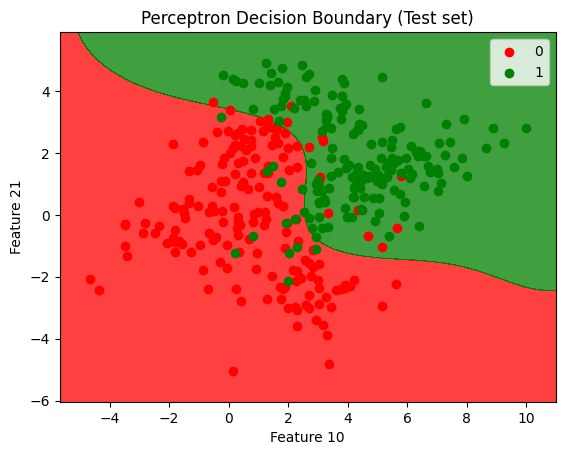

In [26]:
### Kernel
kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

Training score = 0.8984615384615384 ; Test score = 0.88


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


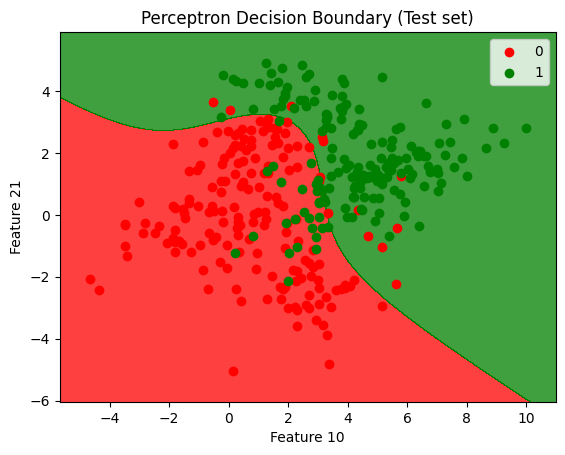

In [10]:
### Kernel
kernSVC = SVC(C = 1, kernel='poly', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

Training score = 0.8938461538461538 ; Test score = 0.8657142857142858


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


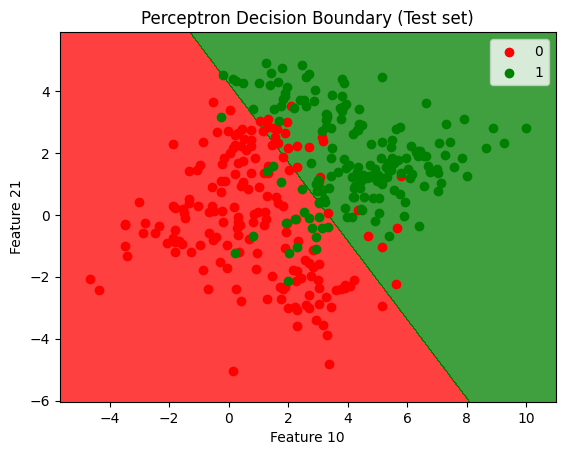

In [11]:
### Kernel
kernSVC = SVC(C = 1, kernel='linear', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

In [12]:
'''rbf seems to perform the best with feature 10 and 21'''

'rbf seems to perform the best with feature 10 and 21'

#### Try scaling x

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x, y))
x = x.rename(columns={0:'Feature10', 1:'Feature21'})

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

Training score = 0.92 ; Test score = 0.9171428571428571


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


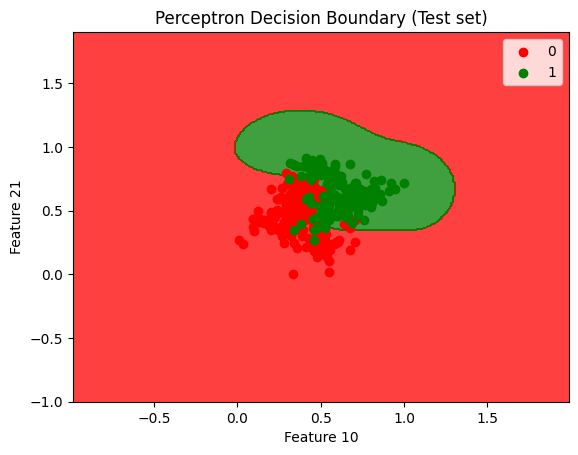

In [14]:
### Kernel
kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

In [16]:
'''Scaling does not seem to affect performance, but does seem to increase speed'''

'Scaling does not seem to affect performance, but does seem to increase speed'

#### Testing different feature combinations

In [17]:
x = data_train.loc[:, ['Feature10', 'Feature20']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

Training score = 0.7815384615384615 ; Test score = 0.8057142857142857


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


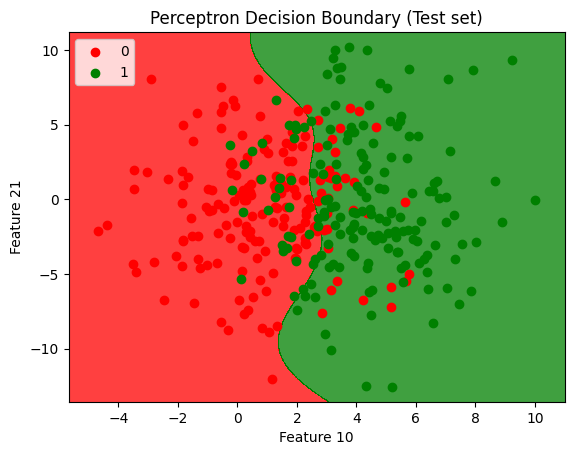

In [18]:
kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature20'].min()-1, stop= X_test['Feature20'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature20'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 20")
plt.legend()
plt.show()

Training score = 0.7923076923076923 ; Test score = 0.7971428571428572


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


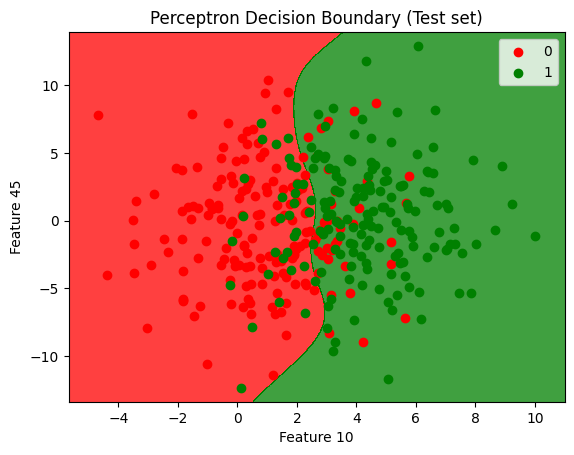

In [19]:
x = data_train.loc[:, ['Feature10', 'Feature45']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature45'].min()-1, stop= X_test['Feature45'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature45'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 45")
plt.legend()
plt.show()


Training score = 0.7123076923076923 ; Test score = 0.7085714285714285


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


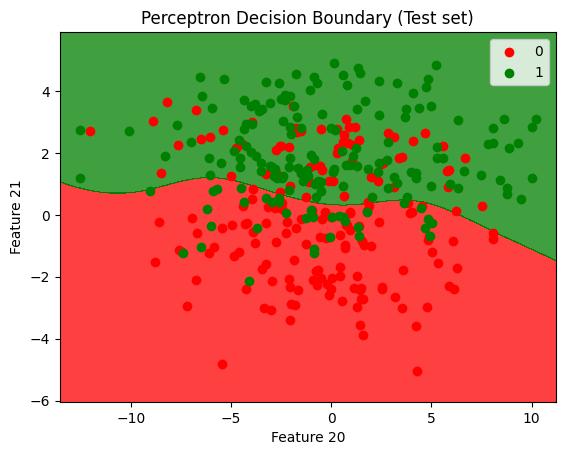

In [20]:
x = data_train.loc[:, ['Feature20', 'Feature21']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature20'].min()-1, stop= X_test['Feature20'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature20'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 20")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

Training score = 0.5676923076923077 ; Test score = 0.5285714285714286


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


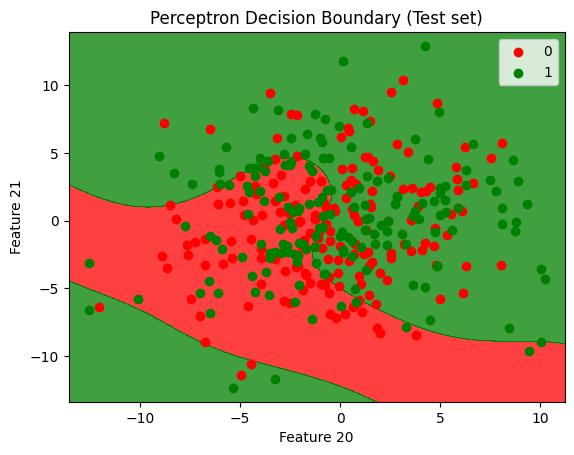

In [21]:
x = data_train.loc[:, ['Feature20', 'Feature45']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature20'].min()-1, stop= X_test['Feature20'].max()+1, step = 0.01), np.arange(start = X_test['Feature45'].min()-1, stop= X_test['Feature45'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature20'][Y_test==j], X_test['Feature45'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 20")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

Training score = 0.7138461538461538 ; Test score = 0.7085714285714285


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


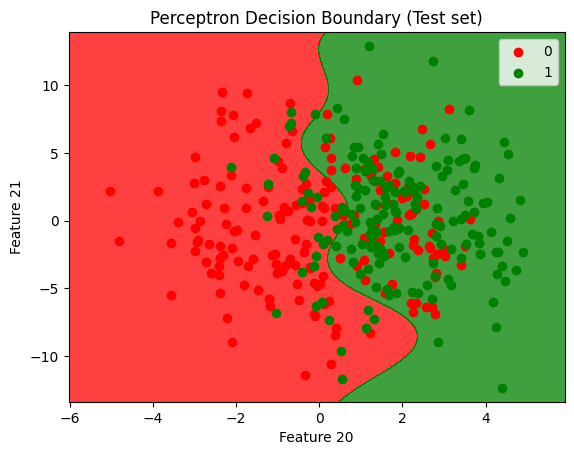

In [6]:
x = data_train.loc[:, ['Feature21', 'Feature45']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35, random_state=213)

kernSVC = SVC(C = 1, kernel='rbf', random_state=int(time.time()))

### Train classifier
kernSVC.fit(X_train, Y_train)

score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01), np.arange(start = X_test['Feature45'].min()-1, stop= X_test['Feature45'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature21'][Y_test==j], X_test['Feature45'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 20")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

#### Conclusions: <br> Only two features with significant performances are 10 and 21

In [55]:
x = data_train.loc[:, ['Feature10', 'Feature21']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=213)

In [56]:
t = 0
score = {'train': 0, 'test': 0}
i = 1
### Train classifier 
while i < 70:
    kernSVC = SVC(C = i, kernel='rbf', random_state=101)
    kernSVC.fit(X_train, Y_train)
    score_train = kernSVC.score(X_train, Y_train)
    score_test = kernSVC.score(X_test, Y_test)
    if (score_train > score['train']) & (score_test > score['test']):
        score['train'] = score_train 
        score['test'] = score_test
        t = i
    i+=1

In [57]:
score['train'], score['test'], t

(0.9183333333333333, 0.92, 1)

Training score = 0.9183333333333333 ; Test score = 0.92


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


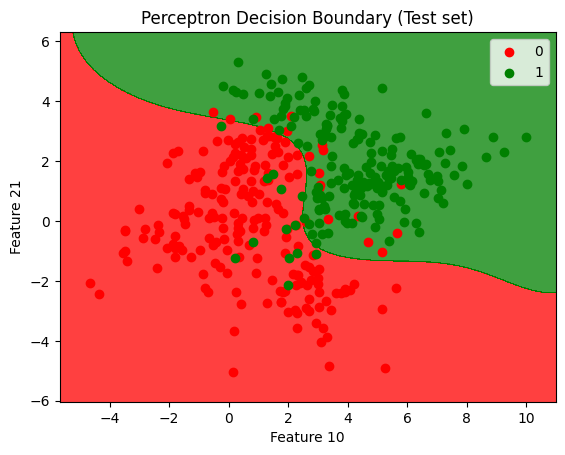

In [59]:
kernSVC = SVC(C = 1, kernel='rbf', random_state = 101)
kernSVC.fit(X_train, Y_train)
score_train = kernSVC.score(X_train, Y_train)
score_test = kernSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature10'].min()-1, stop= X_test['Feature10'].max()+1, step = 0.01), np.arange(start = X_test['Feature21'].min()-1, stop= X_test['Feature21'].max()+1, step = 0.01))
plt.contourf(X1, X2, kernSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature10'][Y_test==j], X_test['Feature21'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 10")
plt.ylabel("Feature 21")
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, kernSVC.predict(X_test)))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       207
           1       0.90      0.93      0.92       193

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [62]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.858 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.883 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [65]:
grid_pred = grid.predict(X_test)

In [67]:
print(classification_report(Y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       207
           1       0.90      0.92      0.91       193

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### Applying model to Test Data

In [31]:
test = pd.read_csv('HW5_Test.csv')
x = test.loc[:, ['Feature10', 'Feature21']]

In [32]:
pred = kernSVC.predict(x)

In [39]:
pred = pd.DataFrame(pred)
pred.to_csv("~/Desktop/ECON_148/HW5/HW5_test_output.csv", index=False)